In [3]:
# 11_model_explainability.ipynb

import shap
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import sys
import os

# Ensure src is accessible
sys.path.append(os.path.abspath(".."))

from src.utils import load_csv

# -----------------------------------
# Load processed data and models
# -----------------------------------
fraud_data = load_csv("../data/processed/train_ready.csv")
creditcard_data = load_csv("../data/processed/creditcard_balanced_smote.csv")

[INFO] Loaded data: ../data/processed/train_ready.csv | Shape: (219136, 10)
[INFO] Loaded data: ../data/processed/creditcard_balanced_smote.csv | Shape: (454902, 31)


In [4]:
# Drop target columns to isolate features
X_fraud = fraud_data.drop(columns=["class"])
y_fraud = fraud_data["class"]

X_credit = creditcard_data.drop(columns=["Class"])
y_credit = creditcard_data["Class"]

In [5]:
# Load trained LightGBM models (or re-train)
fraud_model = lgb.LGBMClassifier(random_state=42)
fraud_model.fit(X_fraud, y_fraud)

credit_model = lgb.LGBMClassifier(random_state=42)
credit_model.fit(X_credit, y_credit)


[LightGBM] [Info] Number of positive: 109568, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 219136, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

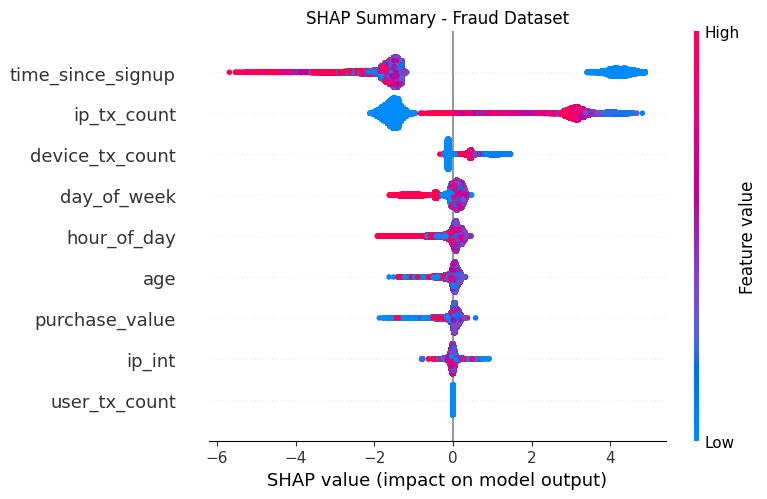

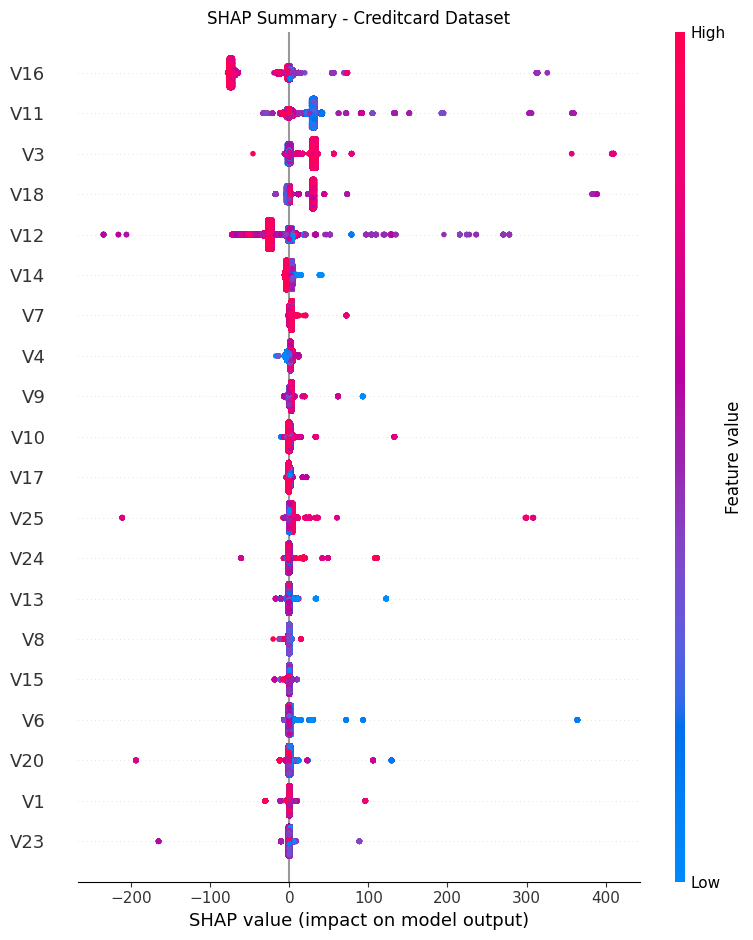

<Figure size 640x480 with 0 Axes>

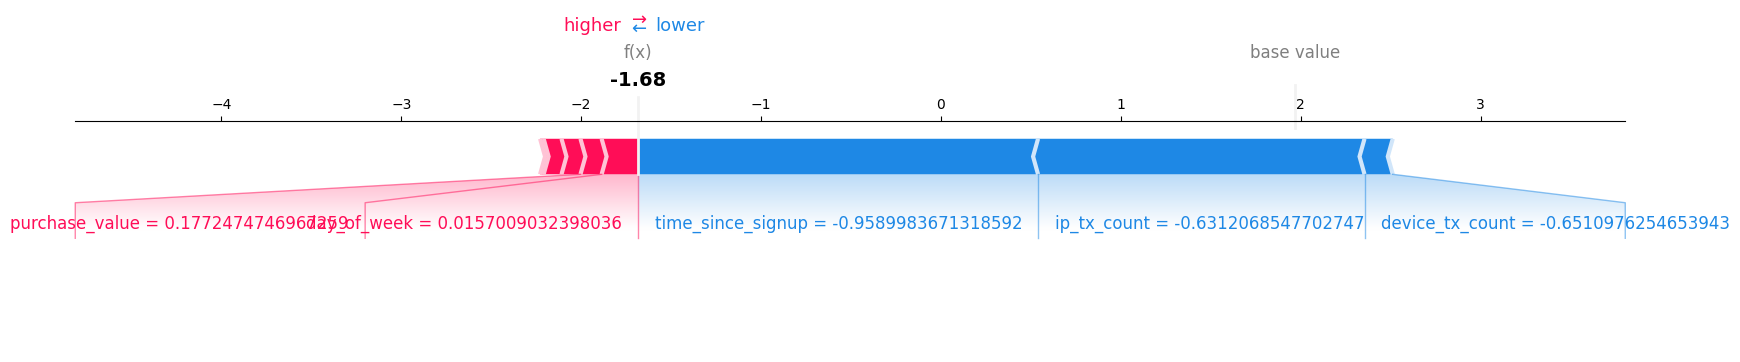

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

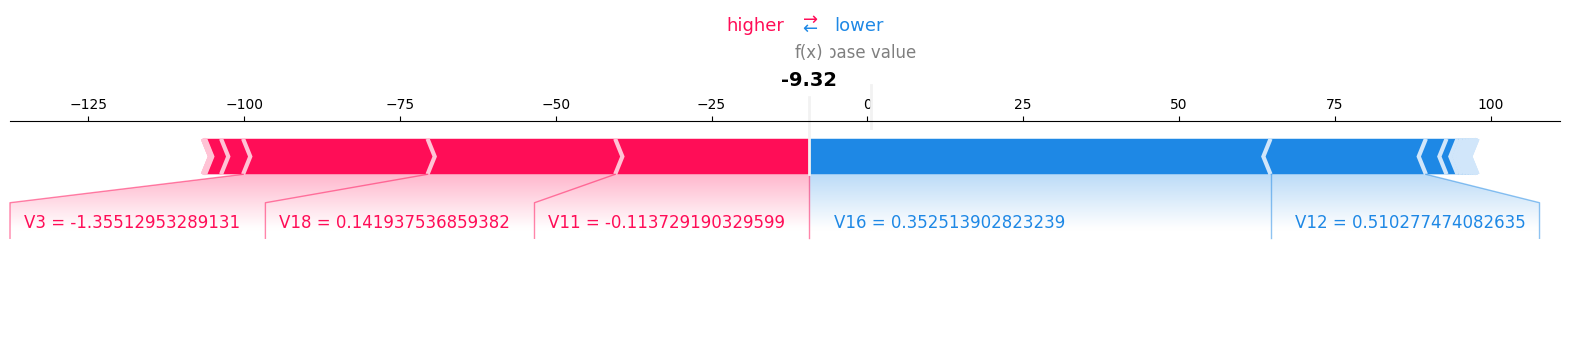

<Figure size 640x480 with 0 Axes>

✅ SHAP plots generated and saved.


<Figure size 640x480 with 0 Axes>

In [7]:
# Create directories to save SHAP outputs
FIG_DIR = "../reports/figures/shap_fig/"
os.makedirs(FIG_DIR, exist_ok=True)

# -----------------------------------
# SHAP Summary Plot (Fraud Data)
# -----------------------------------
explainer_fraud = shap.Explainer(fraud_model)
shap_values_fraud = explainer_fraud(X_fraud)

plt.title("SHAP Summary - Fraud Dataset")
shap.summary_plot(shap_values_fraud, X_fraud, show=False)
plt.savefig(os.path.join(FIG_DIR, "shap_summary_fraud.png"), bbox_inches="tight")
plt.show()
plt.clf()

# -----------------------------------
# SHAP Summary Plot (Creditcard Data)
# -----------------------------------
explainer_credit = shap.Explainer(credit_model)
shap_values_credit = explainer_credit(X_credit)

plt.title("SHAP Summary - Creditcard Dataset")
shap.summary_plot(shap_values_credit, X_credit, show=False)
plt.savefig(os.path.join(FIG_DIR, "shap_summary_creditcard.png"), bbox_inches="tight")
plt.show()
plt.clf()

# -----------------------------------
# SHAP Force Plot for Local Explanation
# -----------------------------------
# Fraud: First prediction
shap.initjs()
force_plot_fraud = shap.force_plot(
    explainer_fraud.expected_value,
    shap_values_fraud[0].values,
    X_fraud.iloc[0],
    matplotlib=True
)
plt.savefig(os.path.join(FIG_DIR, "shap_force_fraud_0.png"), bbox_inches="tight")
plt.show()
plt.clf()

# Creditcard: First prediction
force_plot_credit = shap.force_plot(
    explainer_credit.expected_value,
    shap_values_credit[0].values,
    X_credit.iloc[0],
    matplotlib=True
)
plt.savefig(os.path.join(FIG_DIR, "shap_force_creditcard_0.png"), bbox_inches="tight")
plt.show()
plt.clf()

print("✅ SHAP plots generated and saved.")
